# Pandas Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# see the pre-defined styles provided.
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### DataFrame.plot

In [4]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

A          B          C
2017-01-01 -1.085631  20.059291 -20.230904
2017-01-02 -0.088285  21.803332 -16.659325
2017-01-03  0.194693  20.835588 -17.055481
2017-01-04 -1.311601  21.255156 -17.093802
2017-01-05 -1.890202  21.462083 -19.518638

<IPython.core.display.Javascript object>


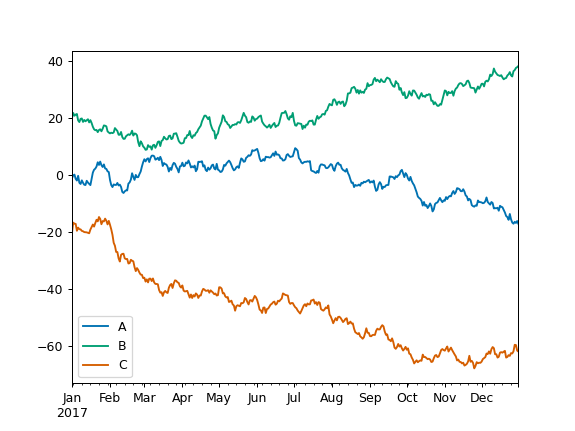

In [5]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

We can select which plot we want to use by passing it into the 'kind' parameter.

<IPython.core.display.Javascript object>


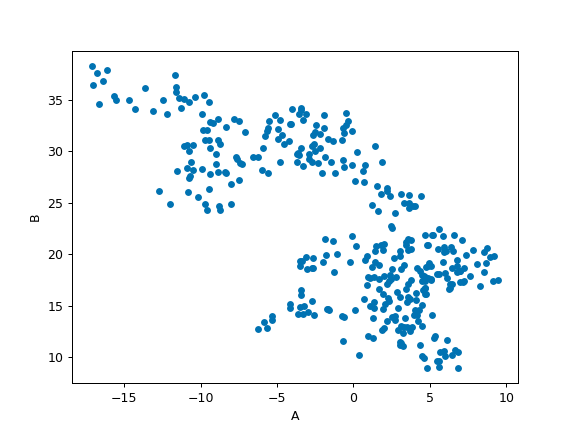

In [6]:
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

<IPython.core.display.Javascript object>


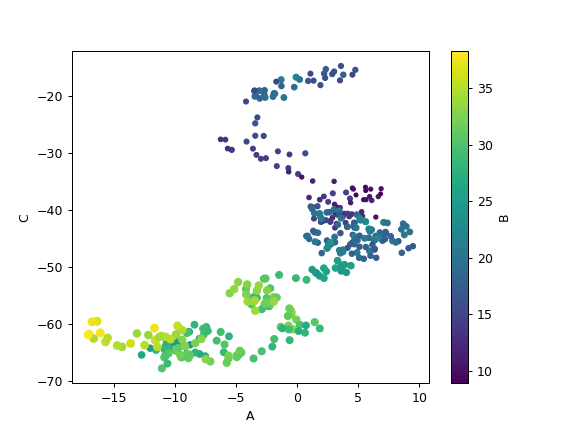

In [7]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

<IPython.core.display.Javascript object>


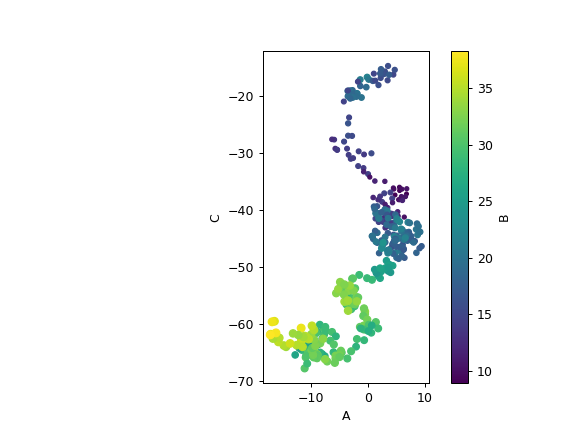

In [8]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


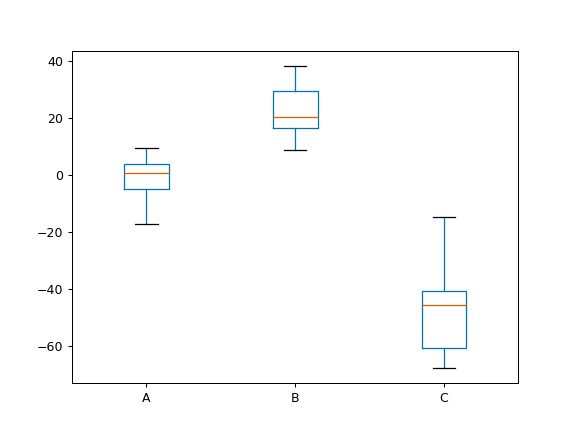

In [9]:
df.plot.box();

<IPython.core.display.Javascript object>


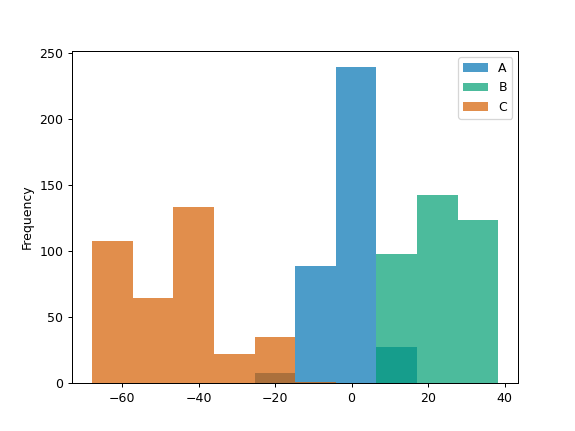

In [10]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

<IPython.core.display.Javascript object>


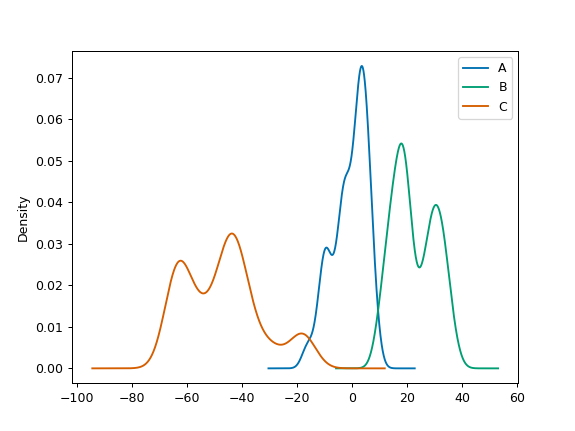

In [11]:
df.plot.kde();

### pandas.tools.plotting

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [13]:
iris = pd.read_csv('iris.csv')
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

<IPython.core.display.Javascript object>


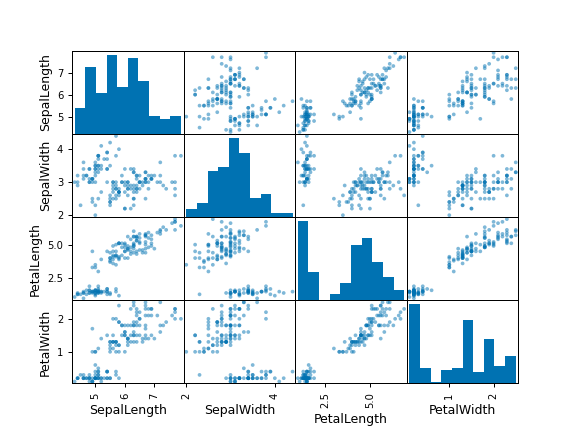

In [15]:
pd.plotting.scatter_matrix(iris);

<IPython.core.display.Javascript object>


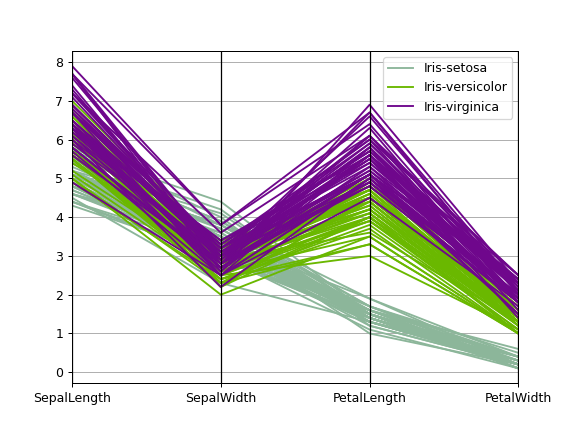

In [18]:
plt.figure()
pd.plotting.parallel_coordinates(iris, 'Name');

# Seaborn

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [20]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

<IPython.core.display.Javascript object>


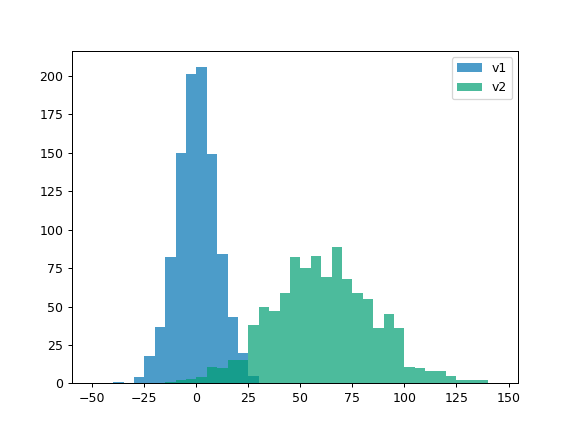

In [21]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

<IPython.core.display.Javascript object>


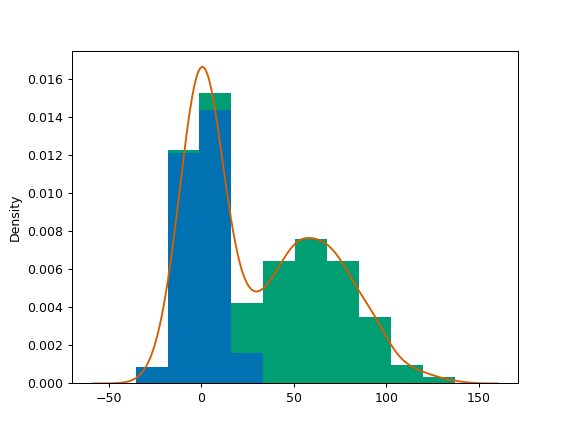

In [24]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', density=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

<IPython.core.display.Javascript object>


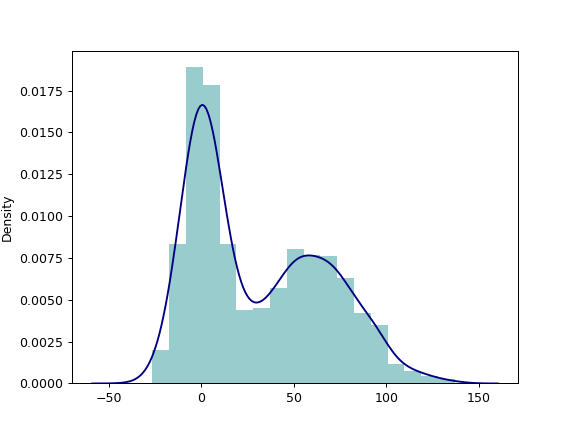

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [25]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


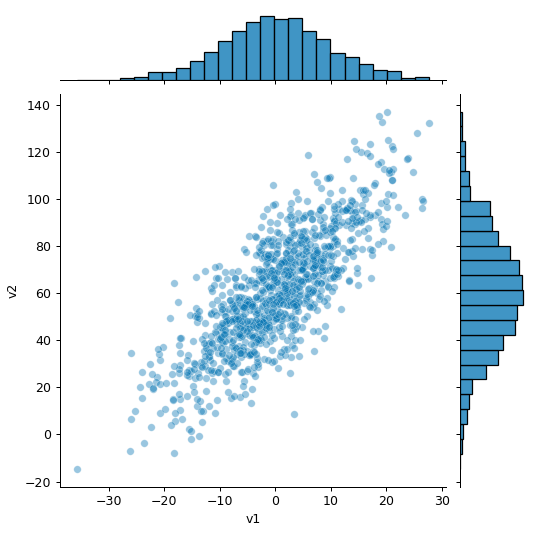

In [26]:
sns.jointplot(v1, v2, alpha=0.4);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


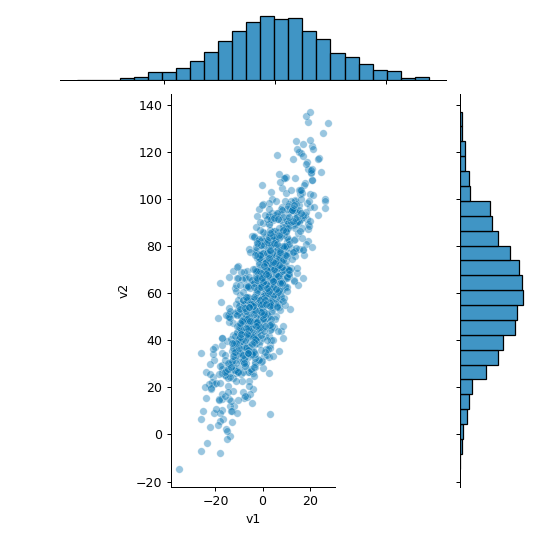

In [27]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


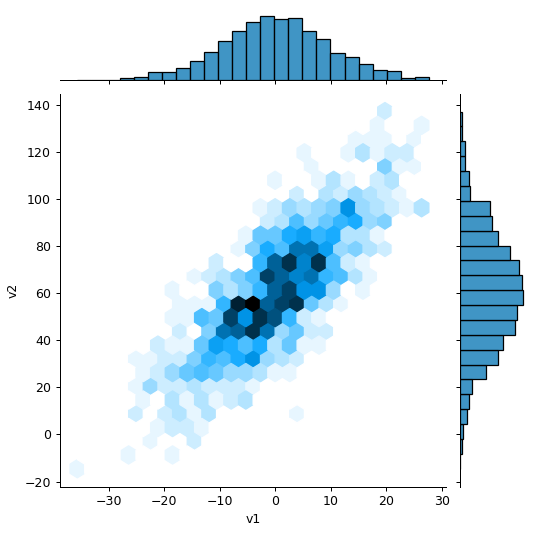

In [28]:
sns.jointplot(v1, v2, kind='hex');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


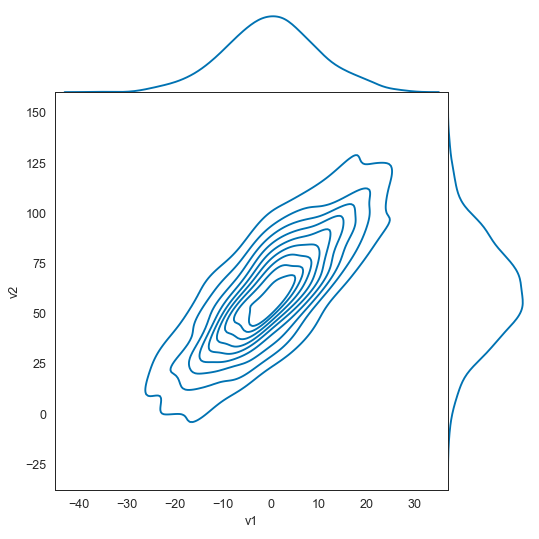

In [29]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

In [30]:
iris = pd.read_csv('iris.csv')
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


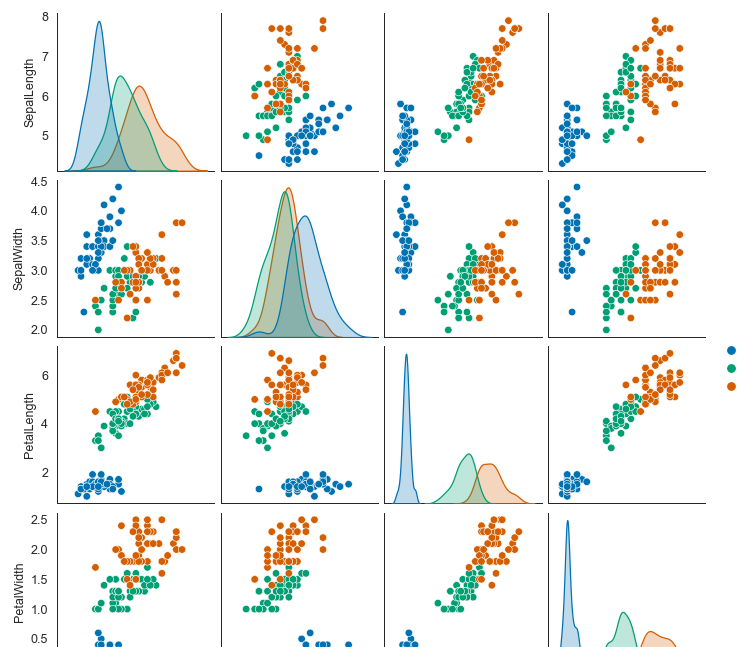

In [31]:
sns.pairplot(iris, hue='Name', diag_kind='kde', size=2);

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);

In [32]:
df_2010 = pd.read_html("https://www.timeanddate.com/holidays/us/2010?hol=8441856", header=1)[0].iloc[1:-1]

In [33]:
df_2010

Date Unnamed: 1                            Name                  Type  \
1     1 Jan     Friday                  New Year's Day       Federal Holiday   
2     6 Jan  Wednesday                        Epiphany             Christian   
3     7 Jan   Thursday          Orthodox Christmas Day              Orthodox   
4     7 Jan   Thursday  International Programmers' Day  Worldwide observance   
5    13 Jan  Wednesday     Stephen Foster Memorial Day            Observance   
..      ...        ...                             ...                   ...   
404  25 Dec   Saturday                   Christmas Day       Federal Holiday   
405  26 Dec     Sunday             Kwanzaa (first day)            Observance   
406  26 Dec     Sunday         Day After Christmas Day         State holiday   
407  31 Dec     Friday      Day off for New Year's Day       Federal Holiday   
408  31 Dec     Friday                  New Year's Eve            Observance   

    Details  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
..      ...  
404     NaN  
405     NaN  
406   Texas  
407     NaN  
408     NaN  

[408 rows x 5 columns]

In [42]:
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_Detroit_Pistons_seasons", header=1)[0]

In [43]:
df

Fort Wayne Zollner Pistons (NBL) Fort Wayne Zollner Pistons (NBL).1  \
0                                 —                            1941–42   
1                                 —                            1942–43   
2                                 —                            1943–44   
3                                 —                            1944–45   
4                                 —                            1945–46   
..                              ...                                ...   
77                          2016–17                            2016–17   
78                          2017–18                            2017–18   
79                          2018–19                            2018–19   
80                          2019–20                            2019–20   
81                          2020–21                            2020–21   

   Fort Wayne Zollner Pistons (NBL).2 Fort Wayne Zollner Pistons (NBL).3  \
0                                   —                                NaN   
1                                   —                                NaN   
2                                   —                                NaN   
3                                   —                                NaN   
4                                   —                                NaN   
..                                ...                                ...   
77                            Eastern                               10th   
78                            Eastern                                9th   
79                            Eastern                                8th   
80                            Eastern                               13th   
81                            Eastern                               15th   

   Fort Wayne Zollner Pistons (NBL).4 Fort Wayne Zollner Pistons (NBL).5  \
0                                   —                                2nd   
1                                   —                                1st   
2                                   —                                1st   
3                             Eastern                                1st   
4                             Eastern                                1st   
..                                ...                                ...   
77                            Central                                5th   
78                            Central                                4th   
79                            Central                                3rd   
80                            Central                                4th   
81                            Central                                5th   

   Fort Wayne Zollner Pistons (NBL).6 Fort Wayne Zollner Pistons (NBL).7  \
0                                  15                                  9   
1                                  17                                  6   
2                                  18                                  4   
3                                  25                                  5   
4                                  26                                  8   
..                                ...                                ...   
77                                 37                                 45   
78                                 39                                 43   
79                                 41                                 41   
80                                 20                                 46   
81                                 20                                 52   

   Fort Wayne Zollner Pistons (NBL).8 Fort Wayne Zollner Pistons (NBL).9  \
0                                .625                                  5   
1                                .739                                  —   
2                                .818                                  —   
3                                .833                                  